# **Project Name**    -  **Google Play Store App Review Analysis**

**Project Type** - EDA

**Contribution** - Individual

**Author** - Chandrim Dey Sajjan

# **Project Summary**

This exploratory data analysis (EDA) project focuses on analyzing the Google Play Store apps data and customer reviews dataset. The goal is to derive actionable insights that can help app-making businesses succeed in the Android market.

The Google Play Store data includes information about various apps such as their names, categories, average user ratings, number of reviews, size, number of installs, pricing, content rating, genres and more. This dataset provides a comprehensive overview of the apps available on the Play Store.
The user reviews dataset contains customer reviews for different apps. It includes the app name, sentiment of the review (positive, neutral, or negative), sentiment polarity (numerical score indicating the review's positivity or negativity) and sentiment subjectivity (score indicating the review's objectivity or subjectivity).

By analyzing these datasets, valuable insights can be obtained. Some potential areas of analysis include:
1. App Categories: Identifying the most popular app categories can help developers understand the market demand and focus their efforts accordingly.
2. Ratings and Reviews: Examining the relationship between app ratings, the number of reviews, and sentiment can provide insights into user satisfaction and feedback. It can help developers understand the factors that contribute to positive or negative user experiences.
3. App Size and Installs: Analyzing the relationship between app size, number of installs, and user ratings can help developers optimize app sizes and understand the impact on user adoption and satisfaction.
4. Pricing Strategy: Exploring the distribution of free and paid apps, analyzing their revenue potential, and understanding the relationship between pricing, user ratings, and downloads can guide developers in formulating effective pricing strategies.
5. App Updates: Analyzing the frequency and impact of app updates on user ratings and reviews can provide insights into the importance of maintaining and improving app quality over time.
6. Sentiment Analysis: Studying sentiment polarity and subjectivity in customer reviews can help identify key strengths and weaknesses of apps and guide developers in addressing user concerns and enhancing user satisfaction.

By conducting a thorough ED and gaining insights from the data, app developers can make informed decisions, prioritize areas for improvement, and create apps that cater to user needs and preferences.

# **Problem Statement**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for category, rating, size, and more.
Another dataset contains customer reviews of the android apps.

# **Define Business Object :**

Discovering key factors responsible for app engagement and success.

# **Let's Begin !**

# *`1.Know Your Data`*

# Imort Libraries

In [ ]:
# Import Libraries numpy, pandas, seaborn and metlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataset Loading

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the the Play Store data and User Reviews data from csv files
play_store_data = pd.read_csv('/content/drive/MyDrive/Data Sets/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/Data Sets/User Reviews.csv')


# Dataset First View

In [ ]:
# Play store data first look
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# User Reviws Data First Look
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Datasets Rows & Columns count

In [ ]:
# Play Store Data's rows and columns count
play_store_data.shape

(10841, 13)

In [ ]:
# User Reviews Data's rows and columns count
user_reviews.shape

(64295, 5)

# Dataset Information

In [ ]:
# Play store data info
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# User Reviews Data Info
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Duplicate Values

In [ ]:
# Checking duplicates in Play Store Data in 'App' column
play_store_data['App'].value_counts()


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
# Checking duplicates in User Reviews in 'App' column
user_reviews['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

# Missing Values/Null Values

In [ ]:
# Missing values/null values count in play store data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

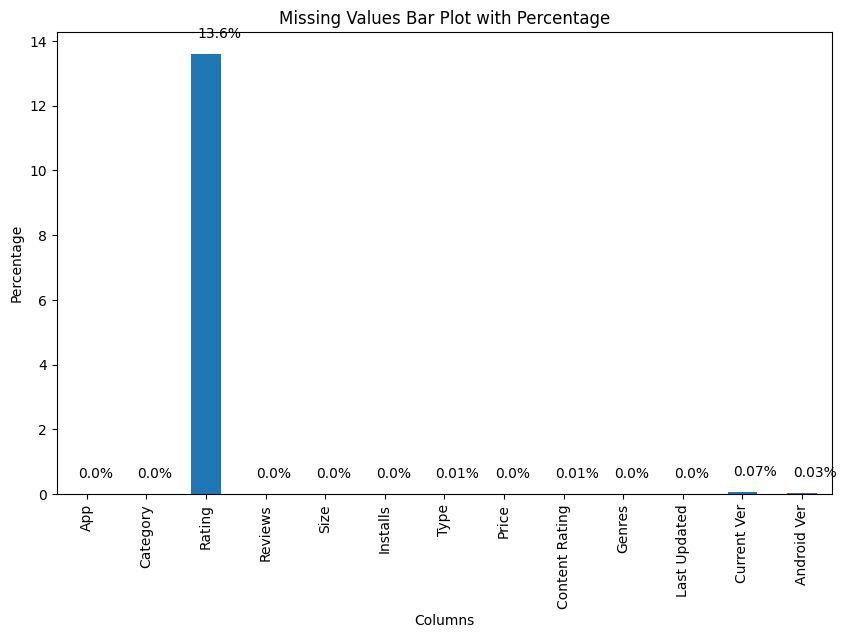

In [ ]:
# Visualizing the missing values
# Calculating missing values percentage for each column
missing_percentage = play_store_data.isnull().mean() * 100

# Creating a bar plot of missing values percentage using pandas and matplotlib
plt.figure(figsize=(10,6))
ax = missing_percentage.plot(kind='bar')
ax.set_title("Missing Values Bar Plot with Percentage")
ax.set_ylabel("Percentage")
ax.set_xlabel("Columns")
for i in ax.patches:
  ax.text(i.get_x() + 0.1, i.get_height() + 0.5, str(round(i.get_height(), 2))+'%' , fontsize=10)
plt.show()

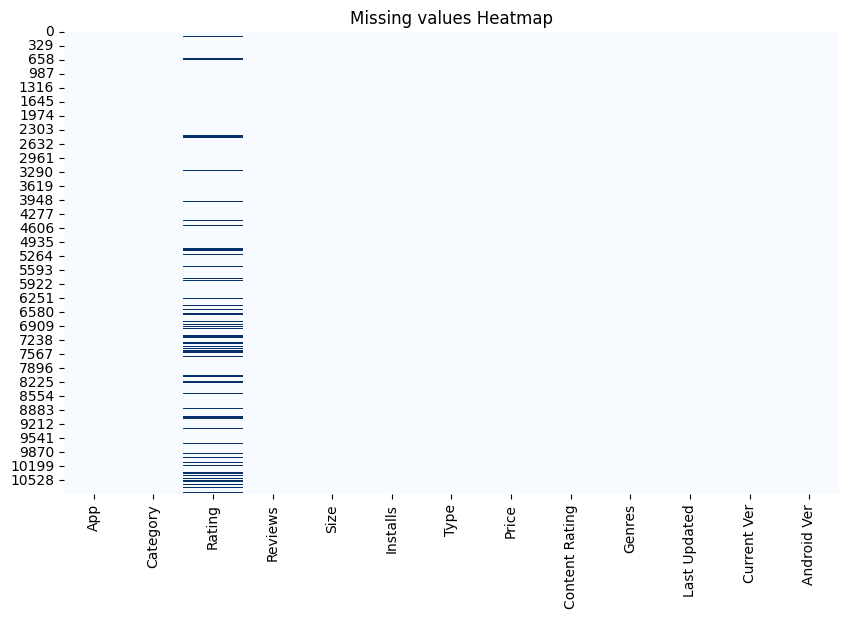

In [ ]:
# Creating a heatmap of missing values using seaborn and metplotlib for more in depth analysis
plt.figure(figsize=(10,6))
sns.heatmap(play_store_data.isnull(), cmap="Blues", cbar=False)
plt.title("Missing values Heatmap")
plt.show()

The heat map is more useful for identifying pattern and correlations between missing values. It provide us a visual summary and can help to identify any patterns or clusters of missing data.

In [ ]:
# Since there is only one missing value in content Rating and Type column. According to my observation it is best to drop them :
play_store_data.dropna(subset = ['Content Rating', 'Type'], inplace=True)

In [ ]:
play_store_data.shape

(10839, 13)

# What did you know about your dataset?

We can see that it contains two different datasets. First dataset containing information on apps that are available in the Google Play Store. This dataset contains information such as the name of the app, its category, its rating, the number of installs, price, etc.
Second dataset is user reviews that contains information about app and it's reviews, sentiment of the customers, Sentiment_Polarity Sentiment_Subjectivity.

The datasets can be used for various data analysis like predicting the popularity of an app based on its characteristics or identifying trends in the types of apps that are most popular on the Play Store.

# *`2. Understanding Your Variable`*

In [ ]:
# Dataset column for Play Store Data
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
play_store_data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
# User Reviews Dataset column
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Dataset Describe
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# Veriables Description

Google Play Store Data
*   App - Name of the app
*   Category - Category of the app

*   Rating - The average user rating of the app, ranging from 1 to 5
*   Reviews - Number of user reviews for the app

*   Size - Size of the app in MB
*   Installs - Number of installs for the app

*   Type - Whether the app is free or paid
*   Price - Price of the app (o if the app is free)

*   Content Rating - Age group for which the app is suitable
*   Genres - The category of the app according to the Play Store's classification system

*   Last Updated - The date when the app was last updated on the Plav Store
*   Current Ver - Current version of the app

*   Android Ver - Minimum Android version reguired to run the app

User Reviews Data

*   App - The name of the app for which the review was submitted
*   Translated_Review - The review text submitted by the user, translated to English if necessary.

*   Sentiment - The sentiment of the customer review, which can be "Positive", "Natural", or "Negative".
*   Sentiment_Polarity - The numerical polarity score of the review, rangig from -1(most negative) to 1(most positive)

*   Sentiment_Subjectivity - The subjectivity score of the review, ranging form 0(objective) to 1 (subjevtive)

# Check Unique Values of Each variables

In [ ]:
# check unique values for each variable
play_store_data.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
play_store_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
play_store_data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
play_store_data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
play_store_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
play_store_data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
play_store_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

# *`3.Data Wrangling`*

In [ ]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We observed that some columns are not that relevent also not responsible for app engagement and success like current version and android version:

In [ ]:
# We can drop all those irrelevent data
play_store_data.drop(['Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [ ]:
# checking the shape
play_store_data.shape

(10839, 11)

In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [ ]:
# Removing Duplicates in App column
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [ ]:
play_store_data.shape

(9658, 11)

We have alredy observed that there are lot of null values Rating column. We cant drop them because they account morethan 10% of the data and by droping, it will effect the data.

In [ ]:
# Calculating mean, median and mode
mean = play_store_data['Rating'].mean()
median = play_store_data['Rating'].median()
mode = play_store_data['Rating'].mode()

In [ ]:
print(mean)
print(median)
print(mode)

4.173243045387994
4.3
0    4.3
Name: Rating, dtype: float64


**Checking** **Outliers**

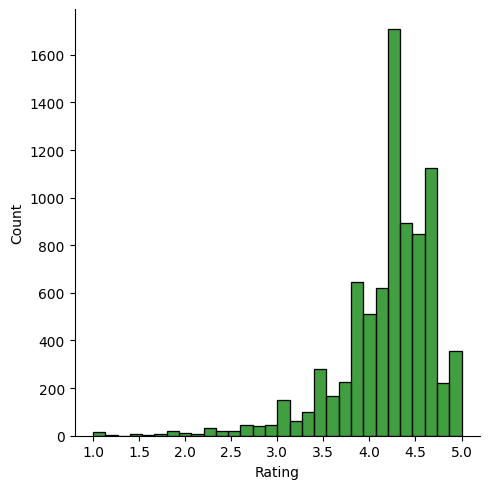

In [ ]:
# Checking outliers in rating using disploy
sns.displot(play_store_data['Rating'], color = 'green', bins=30);

Distribution plot is a useful visualization tool to quickly identify the distribution of a dataset and detect any potential outliers. It allows us to visualize the distribution of the data.

Here, we can clearly see that there are many outliers in Rating column.

<Axes: xlabel='Rating'>

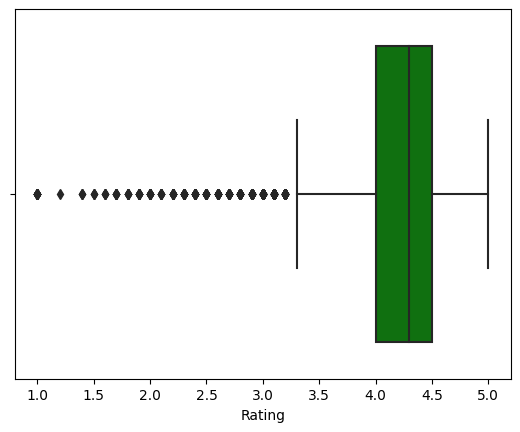

In [ ]:
# Checking outliers im Rating using boxplot
sns.boxplot(x='Rating', color = 'green', data = play_store_data)

In a box plot, outliers are plotted as individual points outside of the whiskers. The whiskers are typically defined as 1.5 times the interquartile range (I0R) from the box. Any data point outside of the whiskers is considered an outlier.

From the above visuals we can see that there is more distribution to the right. Therefore, the median is a better representation of the majority of the values in the variable.

Although the Rating column is a categorical data, it is not wise to replace data with mode because there are more null values.

In [ ]:
# Filling all the null values with median
play_store_data['Rating'].fillna(value = median, inplace = True)

In [ ]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [ ]:
play_store_data.shape

(9658, 11)

We have saw that columns like size, insralls and price column has object datatype instead of any numeric datatype. So, lets convert them into numeric datatype.

In [ ]:
# Checking it again
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   object 
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
dtypes: float64(1), object(10)
memory usage: 905.4+ KB


In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


**Size Column**

In [ ]:
# Cleaning size Column
# Replacing 'Varies with device' with 'NaN'
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

# Removing 'M' from the string and converting to float
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float (x))

# Converting 'k' to 'm' and convert to float
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(str (x) .replace('k', '')) / 1000 if 'k' in str(x) else x)

**Install** **Column**

In [ ]:
# Cleaning Install Column
# Removing the ',' and '+' symbol from installs column
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.strip('+'))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.replace(',', ''))

# Converting to float
play_store_data['Installs'] = play_store_data['Installs'].astype(int)

**Price Column**

In [ ]:
# Clean Price column
#Remove the doller sign and convert the column to float data type
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.strip('$'))
play_store_data['Price'] = play_store_data['Price'].astype(float)

**Last Updated Column**

In [ ]:
# Converting 'Last Updated'column of the play_store_data dataframe into datetime
play_store_data['Last Updated'] = pd.to_datetime(play_store_data['Last Updated'])
# Cinver Last Updated to year only
play_store_data['Last Updated year'] = play_store_data['Last Updated'].dt.year.astype(int)

**Reviews Column**

In [ ]:
# Converting 'Reviews' column of the play_store_date dataframe into float
play_store_data['Reviews'] = play_store_data['Reviews'].astype(float)

In [ ]:
# Checking columns again
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9658 non-null   object        
 1   Category           9658 non-null   object        
 2   Rating             9658 non-null   float64       
 3   Reviews            9658 non-null   float64       
 4   Size               8432 non-null   float64       
 5   Installs           9658 non-null   int64         
 6   Type               9658 non-null   object        
 7   Price              9658 non-null   float64       
 8   Content Rating     9658 non-null   object        
 9   Genres             9658 non-null   object        
 10  Last Updated       9658 non-null   datetime64[ns]
 11  Last Updated year  9658 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 980.9+ KB


In [ ]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2018


# What all manipulations have you done and insights you found?

1. We have removed the duplicate items in 'Apps' column.
2. We have the Android version and current version column as we felt that those columns are not much useful for analysis.
3. We have replaced the null values in the 'Ratinas' column with median of rest of values
4. We have changed the Reviews data column from object type to float.
5. We have changed the Last Undated data column from dataframe tve to datetime.
6. We have cleaned the Size data column by converting KB to MB for the sake of uniformity and changed the column from object type to float.
7. We have changed the Price data column from object type to float.
8. We have cleaned the Installs data column by removing some characters and changed the column from object type to float.

# ***`4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between veriables`***

# Chart- 1

Text(0.5, 1.0, 'Percentage of Free and Paid Apps available on Play Store')

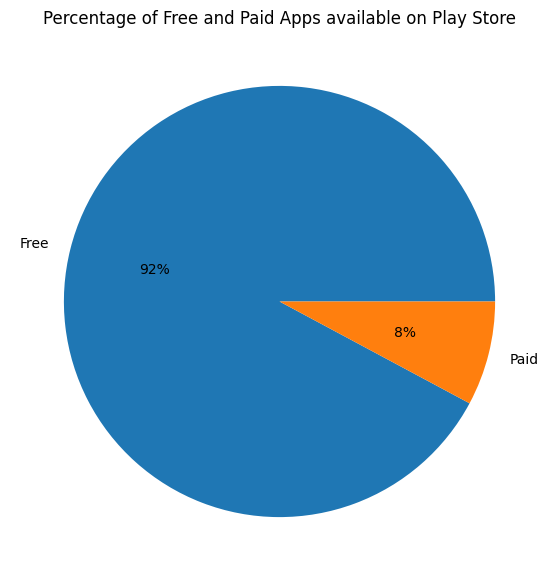

In [ ]:
# Chart-1 visualization code
plt.figure(figsize=(14, 7))

# creating pie chart for paid and free apps
plt.pie(play_store_data.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.0f%%');
plt.title('Percentage of Free and Paid Apps available on Play Store')

# Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. It would be better to use pie chart to represent the percentage of free and paid apps.

# What is/are the insight(s) found from the chart?

From the plot we can observe that maiority of the apps in the Play Store are Free apps.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that the maiority of apps on the Play Store are free. This information can help businesses strategize and tailor their offerings accordingly, considering the market preference for free apps. It provides an opportunity to leverage the larger user base and potentially reach a wider audience.

The insights indicate that paid apps constitute a smaller percentage compared to free apps. This suggests that generating revenue solely through paid app downloads might be more challenging due to the abundance of free alternatives. This could potentially limit the revenue potential for businesses solelv relving on paid apps.

# Chart- 2

Text(0.5, 1.0, 'Percentage of Review sentiments')

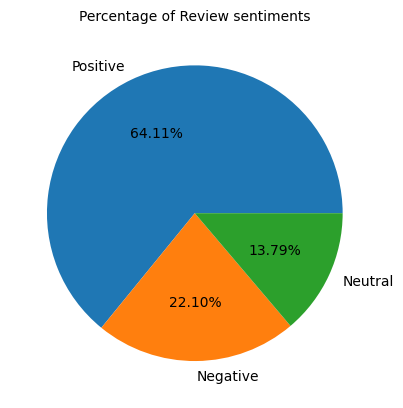

In [ ]:
# Chart - 2 visualization code
labels = user_reviews['Sentiment'].value_counts(sort = True).index
sizes = user_reviews['Sentiment'].value_counts(sort = True)

# Creating pie chart
plt.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title('Percentage of Review sentiments', fontsize = 10)

# Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. It would be better to use pie chart to represent the percentage of free and paid apps.

# What is/are the insight(s) found from the chart?



*   Positive reviews are 64.12%
*   Negative reviews are 22.10%

*   Netural reviews are 13.78%





# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

• **Positive sentiment majority:** The insights reveal that a significant portion of reviews (64.12%) have a positive sentiment. This indicates that a considerable number of users have a positive perception or experience with the product or service. Positive reviews can attract new customers, build trust, and enhance the reputation of the business, potentially leading to increased sales and customer loyalty.

• **Negative sentiment percentage:** The insights indicate that a portion of reviews (22.10%) have a negative sentiment. Negative reviews can be concerning as they may indicate customer dissatisfaction, potential issues with the product or service, or gaps in customer experience. It's crucial for businesses to address and resolve these concerns to prevent negative growth. Ignoring or not effectively addressing negative reviews can lead to a decline in customer satisfaction, negative word-of-mouth, and potential loss of customers.

• **Neutral sentiment percentage:** The insights show that a portion of reviews (13.78%) have a neutral sentiment. While neutral reviews may not have an immediate positive or negative impact, they still provide valuable feedback and insights for businesses. Analyzing neutral reviews can help identify areas for improvement. address customer concerns. and make necessarv adiustments to enhance the overall customer experience

# Chart- 3

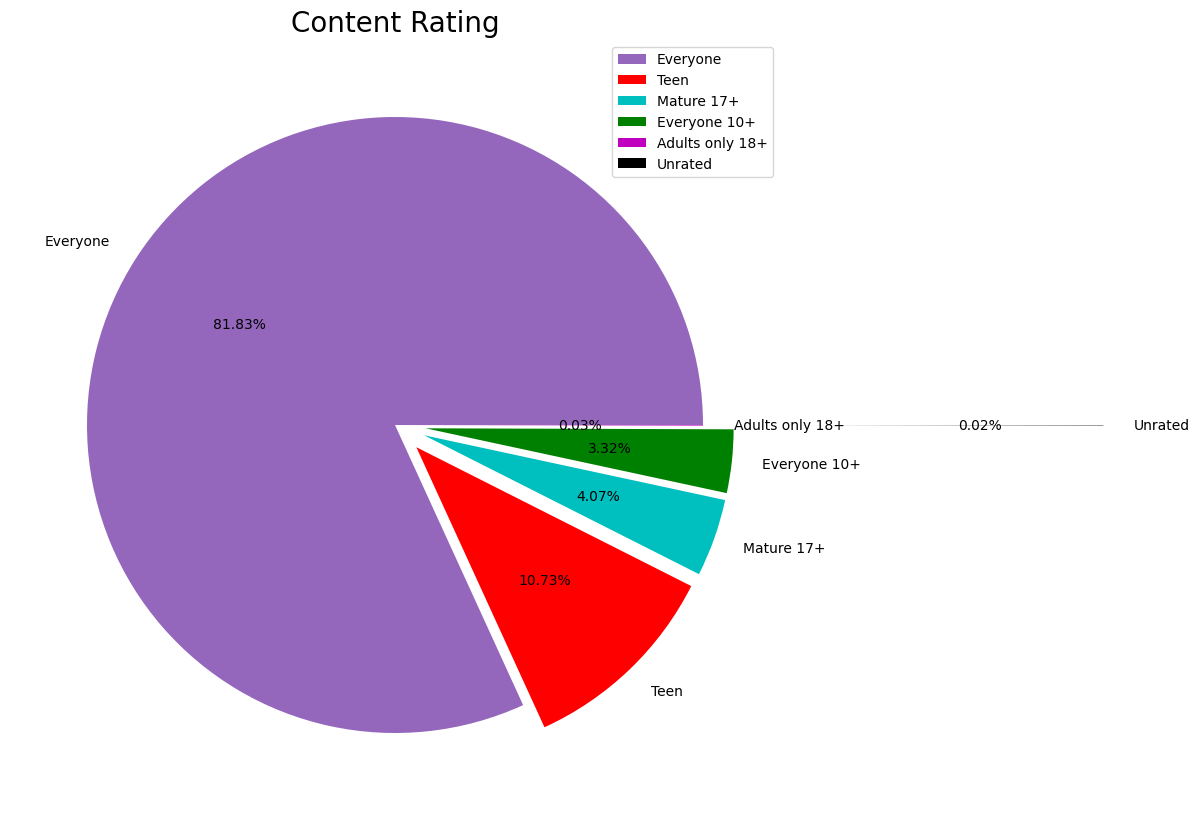

In [ ]:
# Chart-3 visualization code
data = play_store_data['Content Rating'].value_counts(sort = True)
labels = play_store_data['Content Rating'].value_counts(sort = True).index

#Pie chart
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels=labels, colors=colors, autopct ='%.2f%%', explode=explode, textprops={'fontsize':10})
plt.title('Content Rating', size = 20, loc = 'center')
plt.legend()

# Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. It would be better to use pie chart to represent the percentage of free and paid apps.

# What is/are the insight(s) found from the chart?

Majority of the apps can be used by Everyone

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

*   Business need to focus on apps which can be used by everyone for better success as it reaches ide range of people.
*   Catering to only set of customers may cause companies to miss out other potential customers.



# Chart- 4

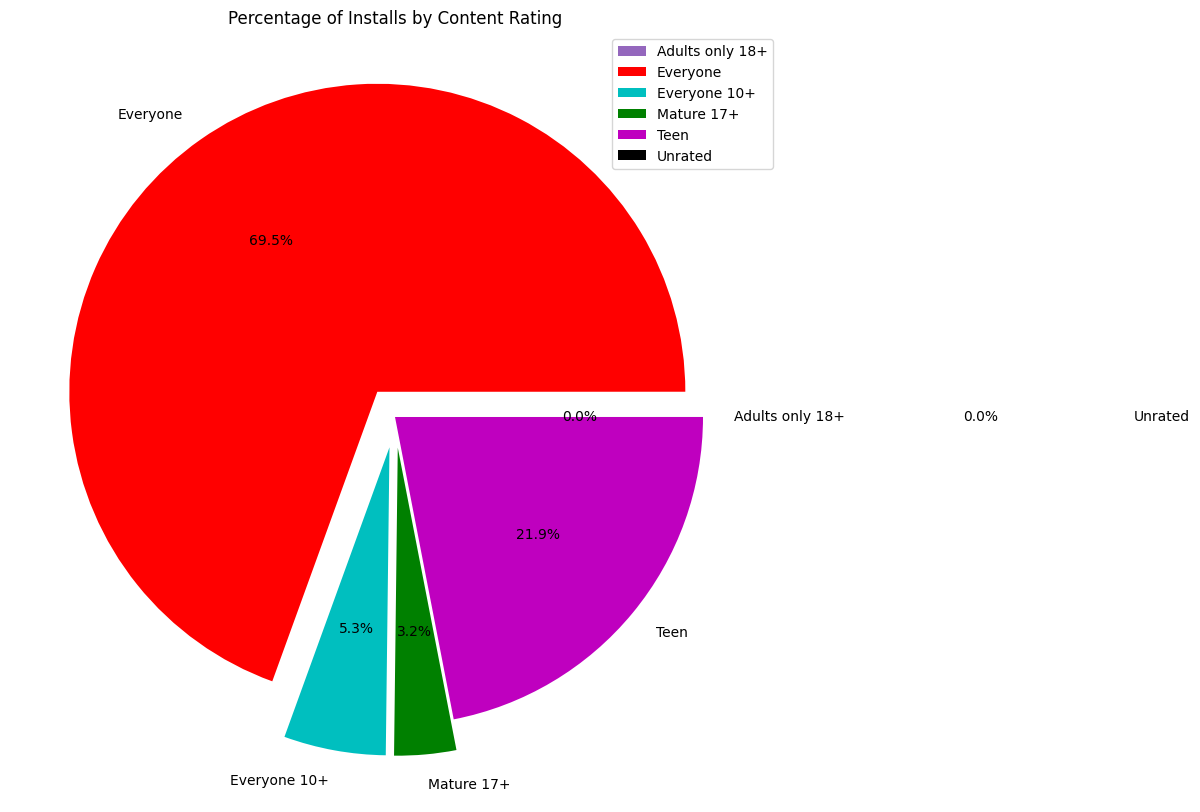

In [ ]:
# Chart- 4 visualization code
# Grouping the data by Content Rating and sum up installs
install_counts = play_store_data.groupby('Content Rating')['Installs'].sum()

# Calculating percentages of installs for each group
total_installs = play_store_data['Installs'].sum()
install_percents = (install_counts / total_installs)*100

# Creating a pie chart
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(install_percents, labels=install_percents.index, colors=colors, autopct="%.1f%%", explode=explode, textprops ={'fontsize': 10})

#Add tittle
plt.title("Percentage of Installs by Content Rating")

#Show Plot
plt.legend()

# Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. It is wise to use pie chart to represent the percentage ofinstalls from different catagories of content.

# What is/are the insight(s) found from the chart?

Majority of the apps can be used by Everyone

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

*   Business need to focus on apps which can be used by everyone for better success as it reaches ide range of people.
*   Catering to only set of customers may cause companies to miss out other potential customers.

# Chart- 5

In [ ]:
# The count of applications in each category by their type
app_count = play_store_data.groupby(['Category', 'Type',])[['App']].count().reset_index().rename(columns={'App':'Count','Index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

<ipython-input-54-bfd7d4264a9a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


Text(0.5, 1.0, 'Count of applications in each category by thir type')

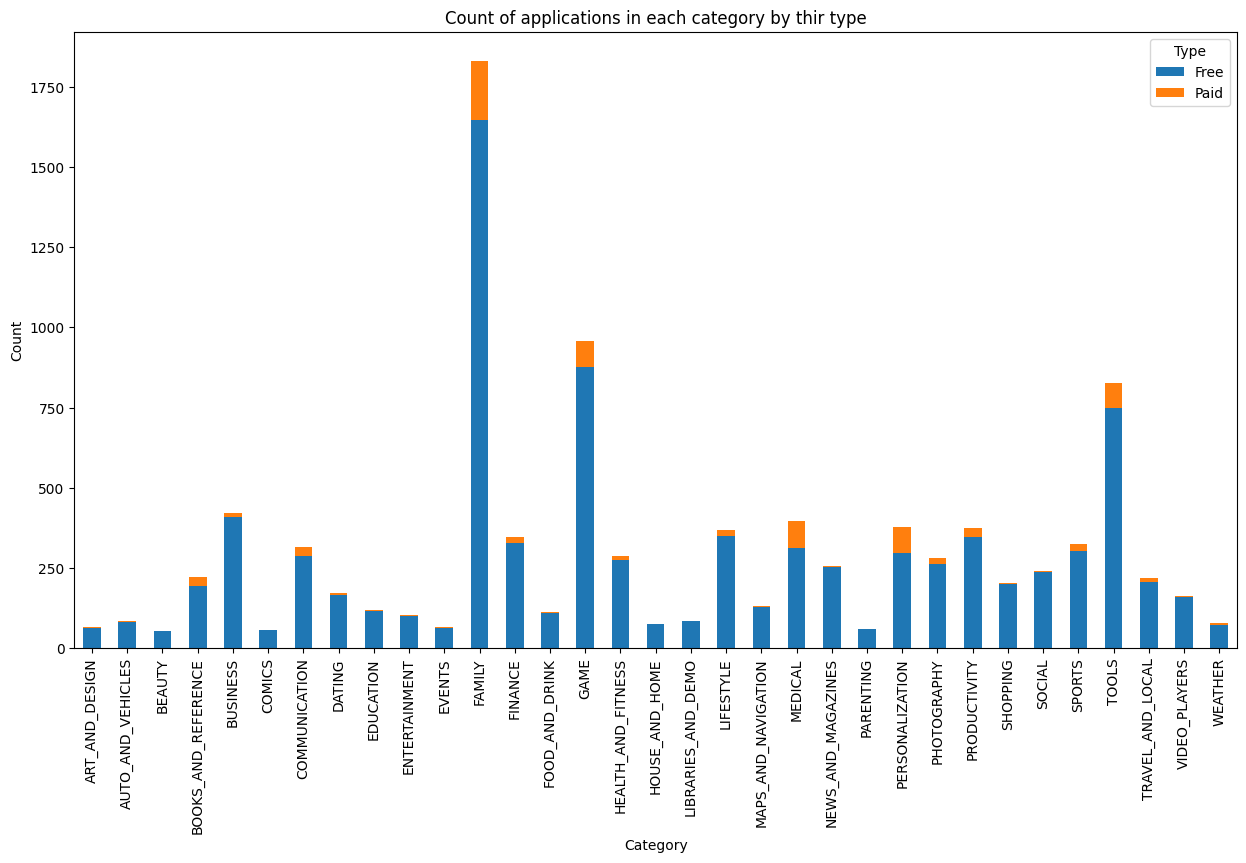

In [ ]:
# Chart- 5 visualization code
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(15,8))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of applications in each category by thir type')

# Why did you pick the specific chart?

The countplot is used to reprasent the occurence(counts) of the observation present in the categorical variable. Since we want to no. of applications in each category by their type, it ould be wise to use it as it as it provide a better visualization.

# What is/are the insight(s) found from the chart?

Family, Game and Tools are top three categories with highest count of applications.

# Will the gained insights help creating a positive business impact?

This information can help businesses understand popular app categories and target their development and marketing efforts accordingly. By focusing on these popular categories, businesses have the opportunity to cater to a larger user base, increase app downloads, and potentially generate higher revenue. The insights from the chart also highlight categories with a relatively low count of applications. These categories mav indicate a lack of competition or demand. which could potentiall lead to negative growth if businesses invest significant resources in developing apps for these categories without proper market research. It's important for businesses to carefully evaluate the market potential and user demand before investing in app development for less popular categories.

# Chart- 6

<ipython-input-56-1894e95bd3b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs'] * paid_df['Price']


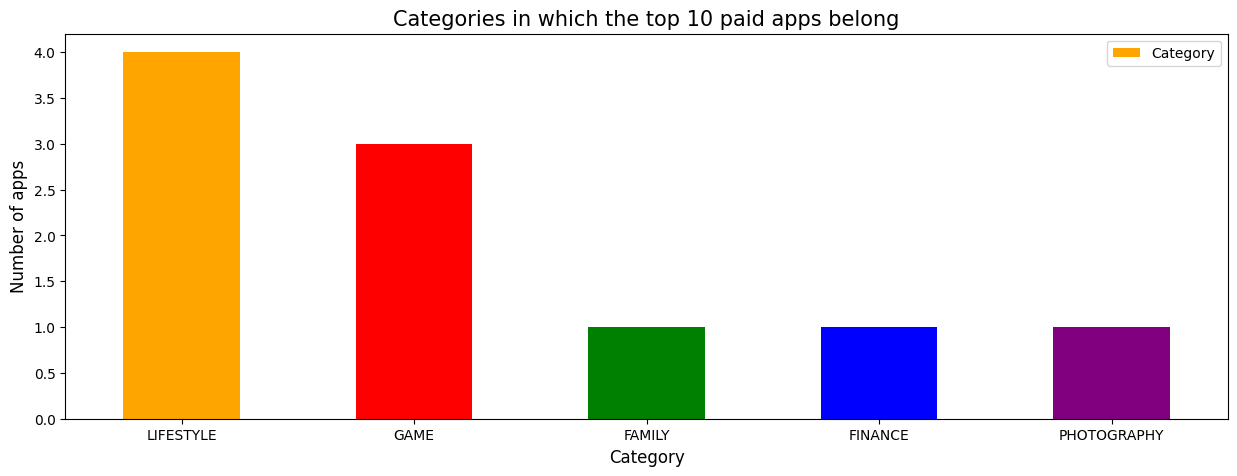

In [ ]:
# Chart-6 visualization code
# Filtering the 'play_store_data' dataframe to include only paid apps
paid_df = play_store_data[play_store_data['Type'] =='Paid']

# Grouping the paid apps by price and count the number of apps in each price category
price_counts = paid_df.groupby('Price')['App'].count().sort_values

#calculate the revanue for each paid app by multiplying the number of instsalls with the price
paid_df['Revenue'] = paid_df['Installs'] * paid_df['Price']

# Find the app with highest revnue
app_with_max_revenue = paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

# Select the top 10 paid apps with the highest revenue
top10paid_apps = paid_df.nlargest(10, 'Revenue', keep='first')

# Plot a bar chart showing the categories of the top 10 paid apps
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color=["orange", "red", "green", "blue", "purple"]);
plt.xlabel('Category', size=12)
plt.ylabel('Number of apps', size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

# Why did you pick the specific chart?

Barplot allows you to compare different sets of data among different groups easilv. It instantly demonstrates this relationship using two axes. where the categories are on one axis and the various values are on the other. Since we want the catogories in which top paid belong. we need two axes i.e., category and no. of apps. Hence barplot is best option for visualisation.

# What is/are the insight(s) found from the chart?

Lifestyle and Game categories has most no. of paid apps.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the top 10 paid apps and their categories, the business can understand which categories are more lucrative and popular among users who are willing to pay for apps. This information can guide the business in developing and promoting similar apps in those categories, potentially leading to increased revenue and customer satisfaction.

# Chart- 7

<ipython-input-57-bef9bd0dfe25>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df = play_store_data.groupby('Rating').sum().reset_index()


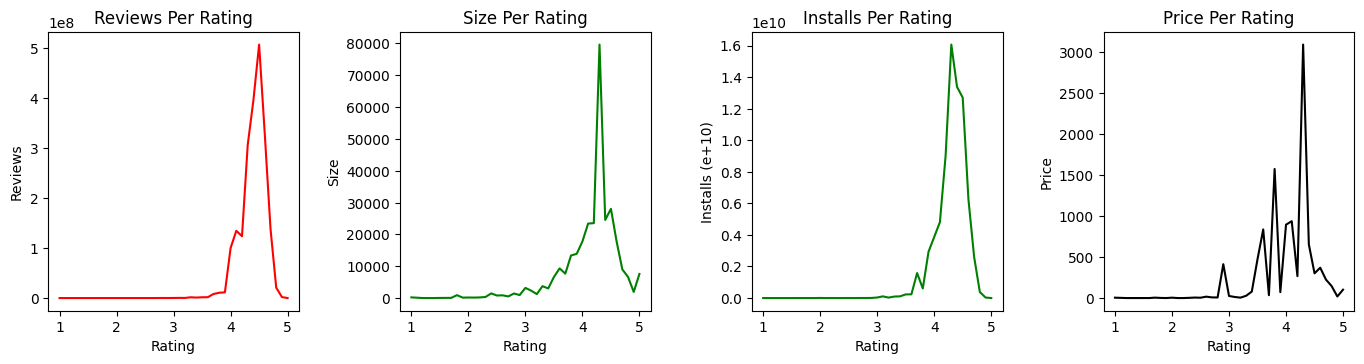

In [ ]:
# Chart-7 Visualization code
#Grouping the play_store_data dataframe by 'Rating and calculating the sum of each music column
rating_df = play_store_data.groupby('Rating').sum().reset_index()

# Creating subplots
fig, axes = plt.subplots(1, 4, figsize=(14,4))

# Creating plot for Reviews column
axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

# Creating a plot for size column
axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

# Creating plot for Installs column
axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')
# Creating plot for Price column
axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)

# Why did you pick the specific chart?

Subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns. Since we want to plot Rating against different other columns, subplots would be the best option. It looks good on subplots rather than plotting each subject seperately as it shows relation with minimal space.

# What is/are the insight(s) found from the chart?

From the above plottings, we can observe that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

# Will the gained insights help creating a positive business impact?

Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Apps with higher ratings in the range of 4.0 - 4.7 tend to have higher reviews, larger sizes, and more installations. This suagests that users are more likely to engage with and download apps that have higher ratinas. Therefore, focusing on improving the ratinas of an app can potentially lead to a positive business impact by increasing user engagement and app downloads.

Negative Growth: There is no direct relationship between the price of an app and its rating. The fluctuation in pricing even within the high rating range indicates that price alone may not significantly influence the rating or user perception. This insight suggests that solelv increasing the price of an app may not lead to negative growth or impact its rating negatively. However, it's important to consider other factors such as app qualit, features, and competition when determining the optimal pricing strategy to avoid negative arowth.

# Chart- 8

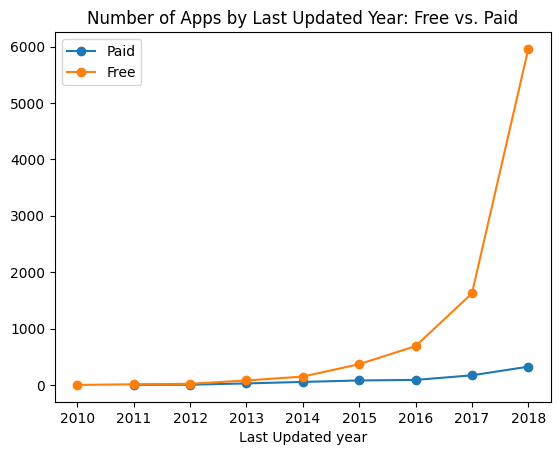

In [ ]:
# Chart - 8 visualization code
# Filtering the 'play_store_data' dataframe to include only free apps
free_df = play_store_data[play_store_data['Type'] == 'Free']

# Filtering the 'play_store_data' dataframe to include only paid apps
paid_df = play_store_data[play_store_data['Type'] == 'Paid']

# Grouping the paid apps by last updated year and counting the number of apps in each year
paid_counts = paid_df.groupby("Last Updated year")["App"].count()
paid_counts.plot.line(marker='o', label='Paid')

# Grouping the free apps by last updated year and counting the number of apps in each year
free_counts = free_df.groupby("Last Updated year")['App'].count()
free_counts.plot.line(marker='o', label='Free')

# Adding a title
plt.title("Number of Apps by Last Updated Year: Free vs. Paid")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# Why did you pick the specific chart?

The line plot with markers ('o') is chosen to visualize the trend of the number of apps over different years for both paid and free apps. This type of chart allows us to observe the changes and patterns in the app counts over time. The use of markers helps to highlight the data points at each year, making it easier to identify specific values.

# What is/are the insight(s) found from the chart?

In the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the vear 2011 and 2018 free apps are increasing.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The increasing number of free apps over the years suggests a growing market for free app offerings. This can be an opportunity for businesses to leverage free apps as a means to attract users, generate brand awareness, and potentially monetize through in-app purchases or advertisements.

Negative Business Impact: The relatively lower number of paid apps compared to free apps indicates potential challenges in monetizing through upfront app purchases. Businesses relying solely on paid app models may face competition from the abundance of free alternatives, which can limit revenue potential.

# Chart- 9

In [ ]:
# count the number of apps in each genre and sort by descending order
top_genres = play_store_data.Genres.value_counts().reset_index().rename(columns={'Genres' : 'Count', 'index': 'Genres'})

# Group apps by genre and sum the number of installs
genres_installs = play_store_data.groupby(['Genres'])[['Installs']].sum()

# Merge the two dataframes by genre to get the number of installs for each genre
top_genres_installs = pd.merge(top_genres, genres_installs, on= 'Genres')

# Get the top 20 genres by count
top_20_genres_installs = top_genres_installs.head(20)

<Axes: title={'center': 'Top 20 Genres'}, xlabel='Genres', ylabel='Count'>

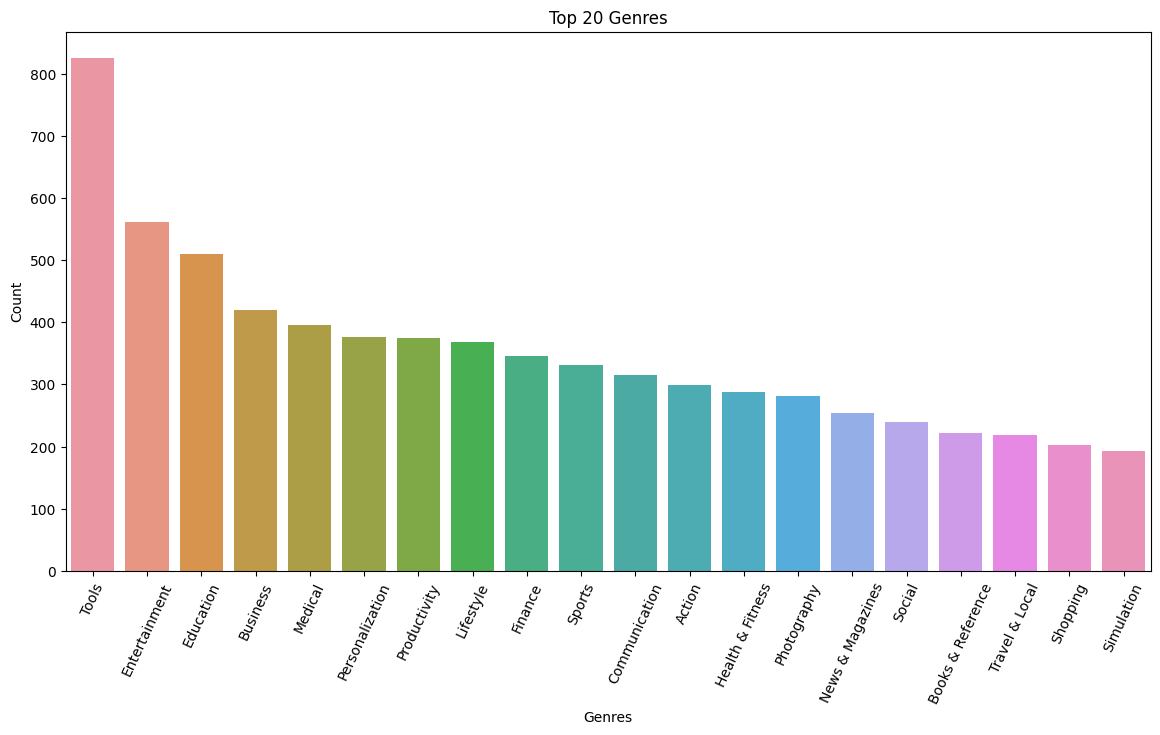

In [ ]:
# Chart - 9 visualization code
# Create a barplot to visualize the top 20 genres by count
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of applications")
plt.title("Top 20 Genres")
sns.barplot(x = top_20_genres_installs.Genres, y = top_20_genres_installs.Count)

# Why did you pick the specific chart?

Barplot allows you to compare different sets of data among different groups easily. It instantly demonstrates this relationship using two axes, where the categories are on one axis and the various values are on the other. Since we want to know top 20 genres by their count, we need two axes i.e. genres and count. Hence barplot is best option for visualisation.

#  What is/are the insight(s) found from the chart?

We can see from the above that Maximum number of apps present in google play store comes under Tools, Entertainment and Education Genres

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: If a business or developer specializes in creating apps in these genres, the high number of apps in these categories indicates a potentially large user base and demand. Focusing on developing and improving apps in these genres can lead to a positive business impact by tapping into a popular and thriving market seament.

Negative Growth: On the other hand, the high number of apps in these genres also means that competition is likely to be intense. Standing out among a large number of similar apps can be challenging, and it may be more difficult to gain visibility, downloads, and user engagement. This could potentiall lead to negative growth if the apps are not able to differentiate themselves or provide unique value propositions compared to the existing apps in the same genres

# Chart- 10

<Axes: title={'center': 'Installs according to Genres'}, xlabel='Genres', ylabel='Installs'>

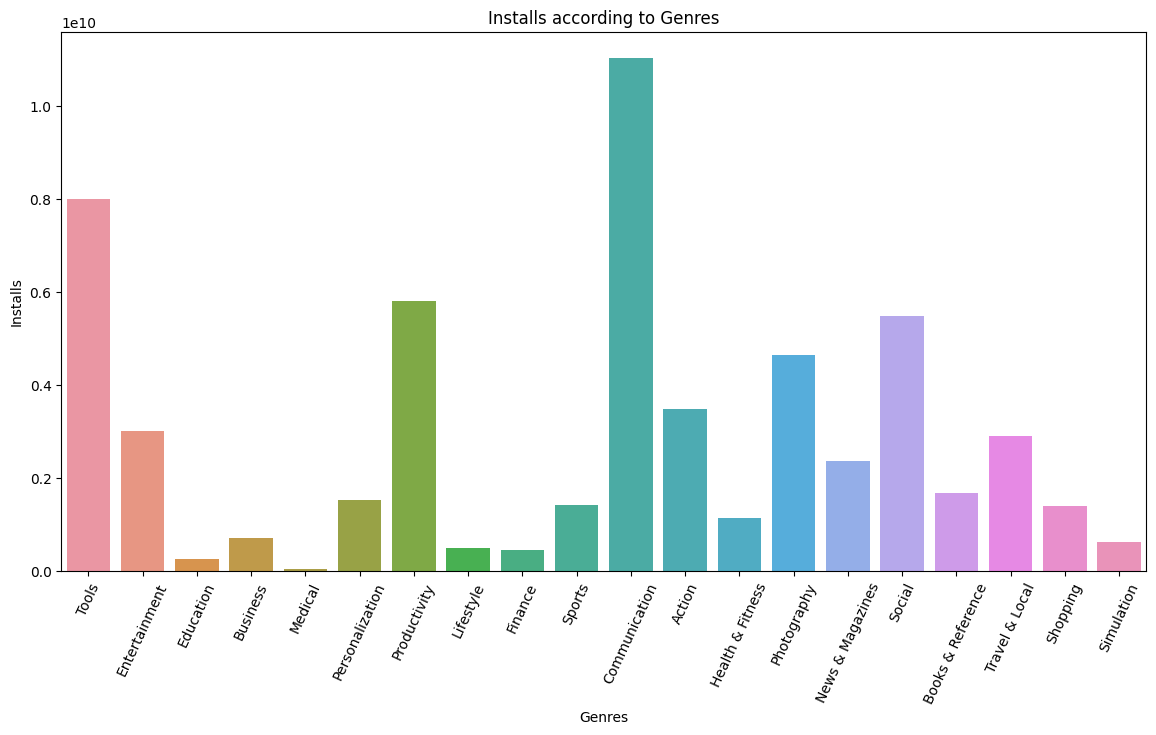

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(x= top_20_genres_installs.Genres, y=top_20_genres_installs.Installs)

# Why did you pick the specific chart?

Barplot allows you to compare different sets of data among different groups easily. It instantly demonstrates this relationship using two axes, where the categories are on one axis and the various values are on the other. Since we want to know top 20 genres by their count, we need two axes i.e. genres and count. Hence barplot is best option for visualisation.

# What is/are the insight(s) found from the chart?

As per the installation and requirement in the market plot, maximum installed apps comes under Communication, Tools and Productivity Geners.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** If a business focuses on creating apps in these genres, it aligns with the market demand and user preferences. The high number of installations indicates a significant user base and potential revenue opportunities. Developing high-quality apps in these genres that meet user needs can lead to a positive business impact, increased visibility, and higher chances of monetization.

**Negative Growth:** However, the high number of installed apps in these genres also implies intense competition. With a large number of apps vina for users' attention. it becomes crucial to differentiate the app and provide unique value to stand out. It mav become challenging to gain visibility and acquire a substantial user base without a solid marketing strategy and a clear differentiating factor. In a crowded market, if the app fails to offer a distinctive advantage or fails to meet user expectations. it may lead to negative growth or limited user adoption.

# Chart- 11

Text(0.5, 0, 'Total number of negative reviews')

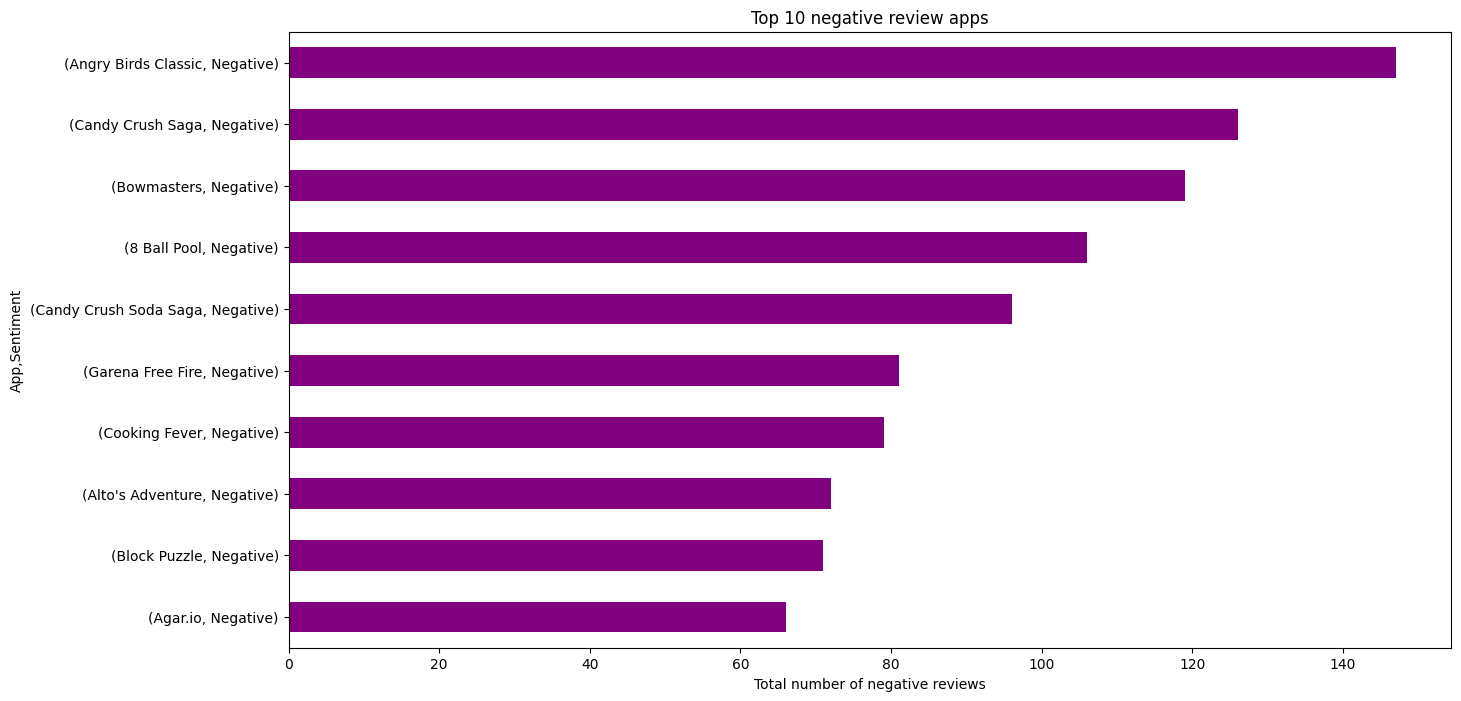

In [ ]:
# Chart - 11 visualization code
# Filtering the 'user_reviews" dataframe to include only negative sentiment reviews
negative_df = user_reviews[user_reviews['Sentiment']== 'Negative']

# Grouping the 'negative_df' dataframe by 'App' and 'Sentiment' columns and counting the number of occurrences of each sentiment for each app
# Selecting the top 10 apps with the highest number of negative reviews
# Plotting a horizontal bar chart to visualize the top 10 negative review apps
negative_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8) ,color= 'purple').invert_yaxis()

# Setting the title and x-label of the plot
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')

# Why did you pick the specific chart?

Barplot allows you to compare different sets of data among different groups easily. It instantly demonstrates this relationship using two axes, where the categories are on one axis and the various values are on the other. Since we want to know top 20 genres by their count, we need two axes i.e. genres and count. Hence barplot is best option for visualisation.

# What is/are the insight(s) found from the chart?

Angry Birds Classic and Candy crush saga has the highest number of negative reviews.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** While high negative reviews may initially seem detrimental, they can provide valuable feedback and opportunities for improvement. By actively addressing and resolving the issues raised in negative reviews, businesses can enhance their products and services, leading to a positive impact. This demonstrates a commitment to customer satisfaction, builds trust, and can result in improved ratings, positive word-of-mouth. and increased user engagement.

**Negative Growth:** However if negative reviews persist and the issues raised are not effectively addressed, it can lead to negative growth. High numbers of negative reviews indicate user dissatisfaction, which can result in decreased user retention, lower app ratings, and reduced new user acquisition. Negative reviews mav also deter potential users from downloading or engaging with the app, impacting business growth.

# Chart- 12

Text(0.5, 0, 'Total no of positive reviews')

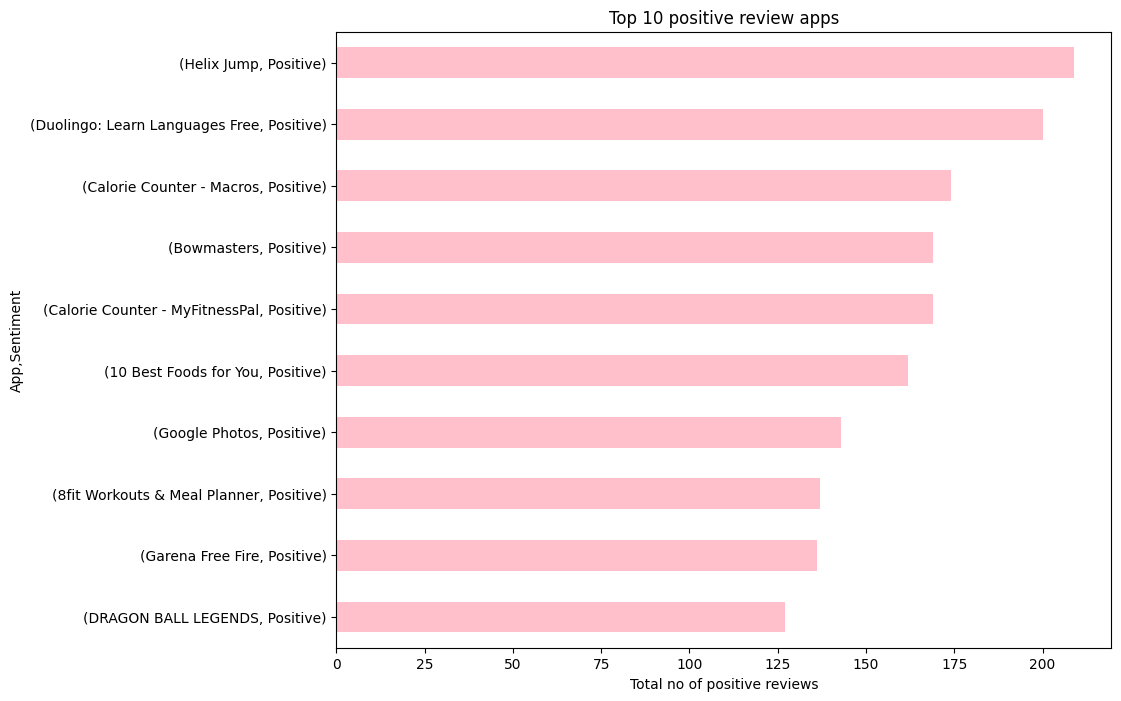

In [ ]:
# Chart - 12 visualization code
# Filtering the 'user_reviews' dataframe to include only positive sentiment reviews
positive_df = user_reviews[user_reviews['Sentiment']=='Positive']

# Grouping the 'positive df' dataframe by 'App' and 'Sentiment columns and counting the number of occurrences of each sentiment for each app
# Selecting the top 10 apps with the highest number of positive reviews
Top_positive_review_apps = positive_df.groupby('App')['Sentiment'].value_counts().nlargest(10)

# Plotting a horizontal bar chart to visualize the top 10 positive review apps
Top_positive_review_apps.plot.barh(figsize=(10,8),color='pink').invert_yaxis()

# Setting the title and x-label of the plot
plt.title("Top 10 positive review apps")
plt.xlabel('Total no of positive reviews')

# Why did you pick the specific chart?

Barplot allows you to compare different sets of data among different groups easily. It instantly demonstrates this relationship using two axes, where the categories are on one axis and the various values are on the other. Since we want to know top 20 genres by their count, we need two axes i.e. genres and count. Hence barplot is best option for visualisation.

# What is/are the insight(s) found from the chart?

Helix Jump and Duolingo has te highest numbers of positive reviews.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** While high negative reviews may initially seem detrimental, they can provide valuable feedback and opportunities for improvement. By actively addressing and resolving the issues raised in negative reviews, businesses can enhance their products and services, leading to a positive impact. This demonstrates a commitment to customer satisfaction, builds trust, and can result in improved ratings, positive word-of-mouth. and increased user engagement.

**Negative Growth:** However if negative reviews persist and the issues raised are not effectively addressed, it can lead to negative growth. High numbers of negative reviews indicate user dissatisfaction, which can result in decreased user retention, lower app ratings, and reduced new user acquisition. Negative reviews mav also deter potential users from downloading or engaging with the app, impacting business growth.

# Chart- 13

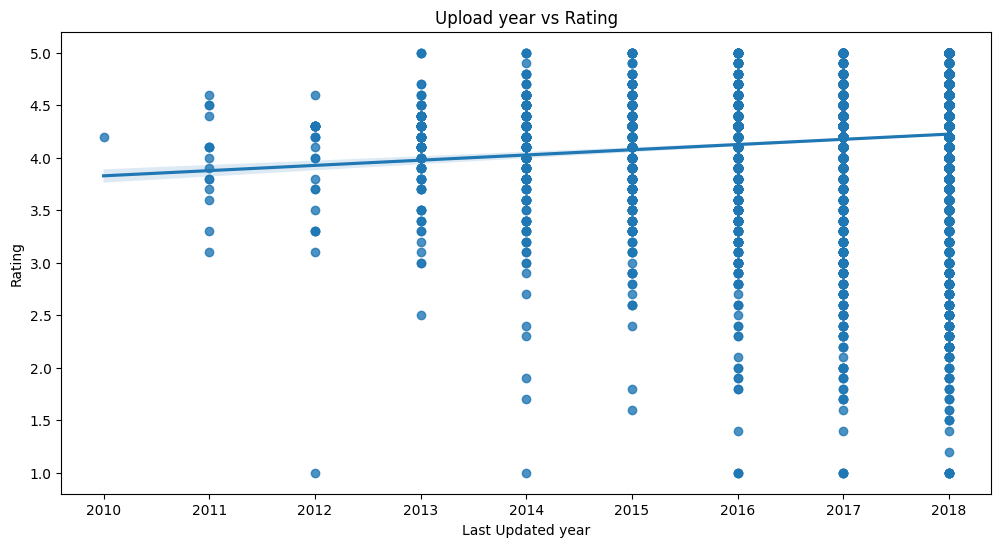

In [ ]:
# Chart - 13 visualization
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

# Extract the year from the 'Last Updated' column
play_store_data['Last Updated Year'] = play_store_data['Last Updated'].dt.year

# Plotting a regression plot
sns.regplot(x="Last Updated year", y="Rating", data=play_store_data)

# Setting the tittle of the year
plt.title("Upload year vs Rating");

# Why did you pick the specific chart?

regplot() method is used to plot data and draw the relationship between two variables. Since we are knowing the relation between Last Updated Year and Rating, this would be the best option.

# What is/are the insight(s) found from the chart?

There is a positive correlation between the "Update Year" and the "Rating" of the apps. As the update year increases, there is a tendency for the apps to have higher ratings. This suggests that apps that are more recently updated are more likely to have better ratings. Users may perceive apps that receive regular updates as more reliable, functional, and up-to-date, leading to higher ratings.

# Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The positive correlation between the "Update Year" and "Rating" suggests that regularly updating apps can lead to higher ratings. Higher ratings are often associated with user satisfaction, trust, and increased app visibility in the marketplace. This can attract more users, improve app rankings, and positivelv impact the app's reputation and revenue. However. it's important to note that while the insights suggest a positive correlation, they do not guarantee immediate or universal success. Other factors such as app quality, user experience, marketing strategies, and competition also play a significant role in achieving positive business impact.

# Chart- 14

<Axes: xlabel='Size', ylabel='Rating'>

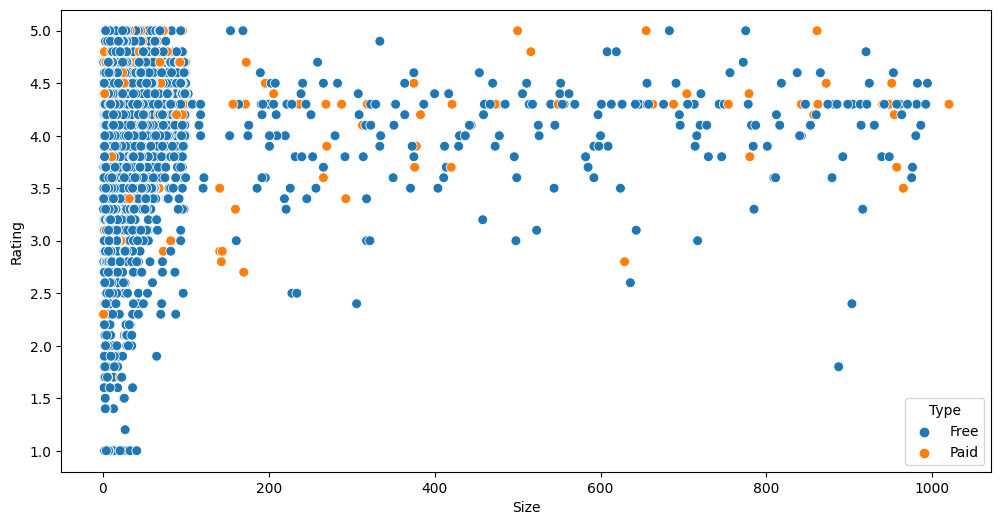

In [ ]:
# Chart- 14 visualization code
plt.figure(figsize=(12,6))
sns.scatterplot(x= play_store_data['Size'], y= play_store_data['Rating'], hue=play_store_data['Type'], s=50)

# Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Since we want to show distribution of apps in term of their rating, size and type, scatterplot would be best to use because it shows how rating and size affects each other and also by their type.

# What is/are the insights found from the chart?

From this scatter plot. we can imply that maiority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

# Will the gained insights help creating a positive business impact?

***`Are there any insights that lead to negative growth? Justify with specific reason.`***



The gained insights from the scatter plot can potentially help create a positive business impact for the following reasons:

• **Free apps:** The majority of free apps being small in size and having high ratings suggest that users prefer lightweight and efficient apps that offer a good user experience. This insight can guide app developers in prioritizing app optimization, reducing app size, and focusing on delivering a high-quality user experience

• **Paid apps:** The relatively equal distribution of size and rating for paid apps indicates that users have different expectations when paying for an app. This insight suggests that paid apps should prioritize offering valuable features, unique functionalities, or exclusive content to justify the price tag.



***`Regarding insights that may lead to negative growth, it's important to consider the potential challenges and drawbacks associated with these insights:`***

• **Free apps:** While users generally prefer small-sized apps with high ratings, it's crucial to strike a balance between app size and functionality. If the app size becomes too small at the expense of essential features, it may result in a negative user experience and poor ratings. Therefore, businesses should focus on optimizing app size without compromising core functionalities.

• **Paid apps:** Although the scatter plot doesn't explicitly show negative growth insights, it's important to note that paid apps face the challenge of convincing users to pay for their offerings. Businesses should carefully evaluate the value proposition and user expectations to avoid launching paid apps that fail to meet user demands.

# Chart- 15

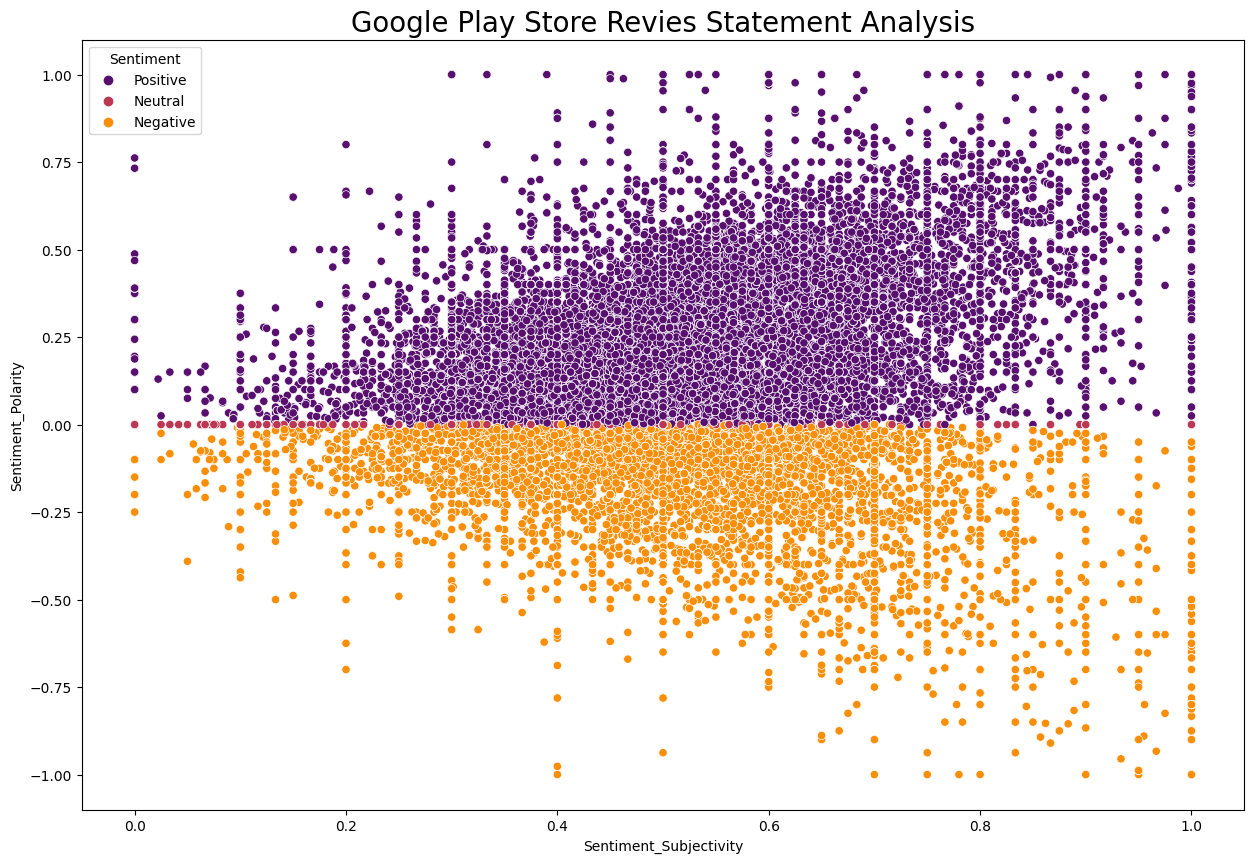

In [ ]:
# Chart- 15 Visualization Code
plt.figure(figsize=(15,10))
sns.scatterplot(x= user_reviews['Sentiment_Subjectivity'], y= user_reviews['Sentiment_Polarity'], hue= user_reviews['Sentiment'], edgecolor='white', palette="inferno")
plt.title('Google Play Store Revies Statement Analysis', fontsize=20)
plt.show()

# Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Since we want to show the sentiment analysis, scatterplot shows how much subjectivity affects polarity and vice versa

# What is/are the insight(s) found from the chart?

From the above scatter plot it can be concluded that sentiment subiectivity is not alwas proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

# Will the gained insights help creating a positive business impact?

The scatter plot indicates that sentiment subjectivity and polarity are not always directly proportional, but they often exhibit a proportional behavior in most cases. This insight can help businesses analyze user sentiment more effectively and make informed decisions based on the sentiment analysis results
By understanding the relationship between sentiment subjectivity and polarity, businesses can enhance their sentiment analysis models and algorithms to better classify user sentiments. This can be useful for various applications such as social media monitoring, customer feedback analysis, brand reputation management, and targeted marketing campaigns.

While the scatter plot does not explicitly indicate insights that lead to negative growth, it's important to interpret the data in the context of specific business goals and objectives. Negative growth can occur if businesses solely rely on sentiment analysis without considering other factors such as the overall customer experience, product quality, competition, and market trend

# Chart- 16 : **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation between columns')

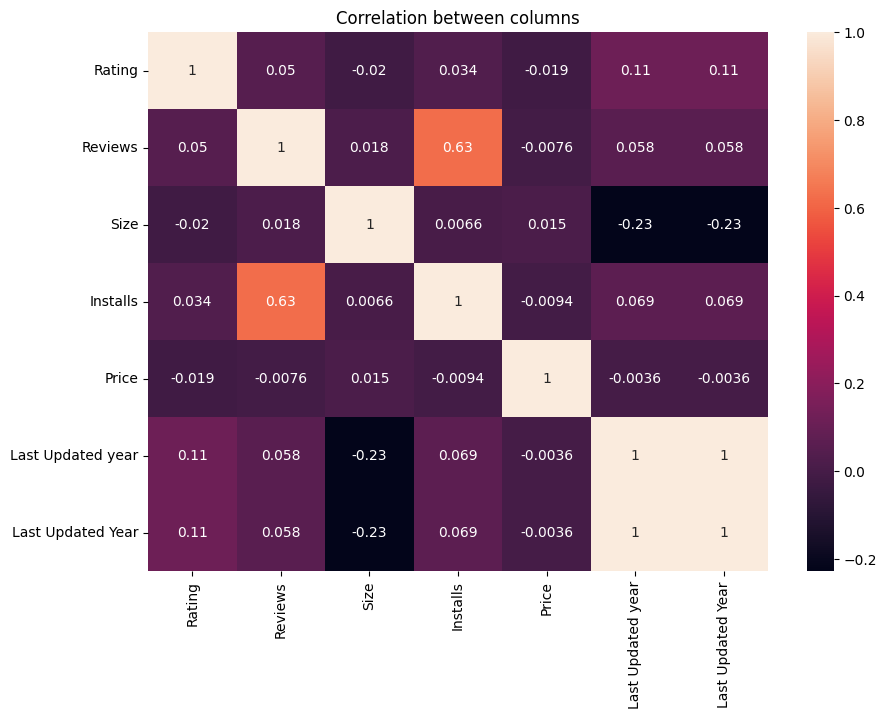

In [ ]:
# Chart- 16 visualization code
# Correlational Heatmap Visualization code
plt.figure(figsize = (10,7))
sns.heatmap(play_store_data.corr(numeric_only=True), annot = True)
plt.title('Correlation between columns')

# Chart- 17

Text(0.5, 1.0, 'Correlation between columns of play store data and user reviews')

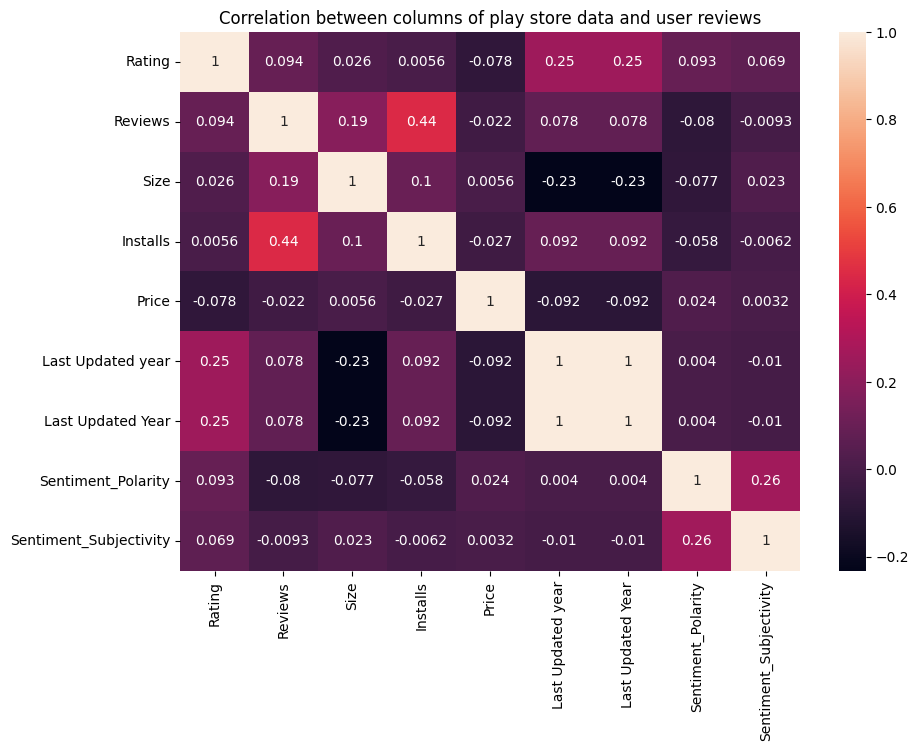

In [ ]:
# Chart- 17 visualization code
# Margeing two dataframe
merged_df = pd.merge(play_store_data, user_reviews, on= 'App')

#Coreelation Heatmap visualization code
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.corr(numeric_only= True), annot= True)
plt.title('Correlation between columns of play store data and user reviews')

# Why did you pick the specific chart?

Correlation heatmaps are the good option to find potential relationships between variables and to understand the strength of these relationships.

# What is/are the insight(s) found from the chart?

1. There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
2. The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
3. The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases. the app installs and number of reviews also increase.
4. Sentiment polarity shows a very weak positive correlation with sentiment subiectivity, indicating that as the polarity of sentiment (positive or negative) increases, there is a slight tendency for subjectivity (the degree of personal opinion) to also increase. However, this relationship is not very strona.
5. Interestinal, sentiment polarity demonstrates a strona positive correlation with rating and price. This suagests that as the sentiment polarity becomes more positive (indicating a more positive sentiment), there is a tendency for higher ratings and higher prices.

6. On the other hand, sentiment polarity exhibits a negative correlation with size and installs. This implies that as the sentiment polarity becomes more negative, there is a tendency for smaller app sizes and potentially lower numbers of installs.
7. Moving on to sentiment subjectivity, it displays a strong positive correlation with price, size, and rating. This means that as the subjectivity of sentiment (the expression of personal opinion) increases, there is a tendency for higher prices, larger app sizes, and potentially higher ratings. However, the correlation between sentiment subjectivity and sentiment polarity is weak, suggesting that the subjective expression of opinion does not necessarily align strongly with the polarity of sentiment.
8. Additionall. sentiment subiectivity shows a negative correlation with installs. This indicates that as the subiectivity of sentiment increases, there is a tendency for lower numbers of installs. This could imply that more subiective opinions may not resonate as strongly with app users, potentially impacting app popularity and adoption.

# Chart- 18 : **Pair Plot**

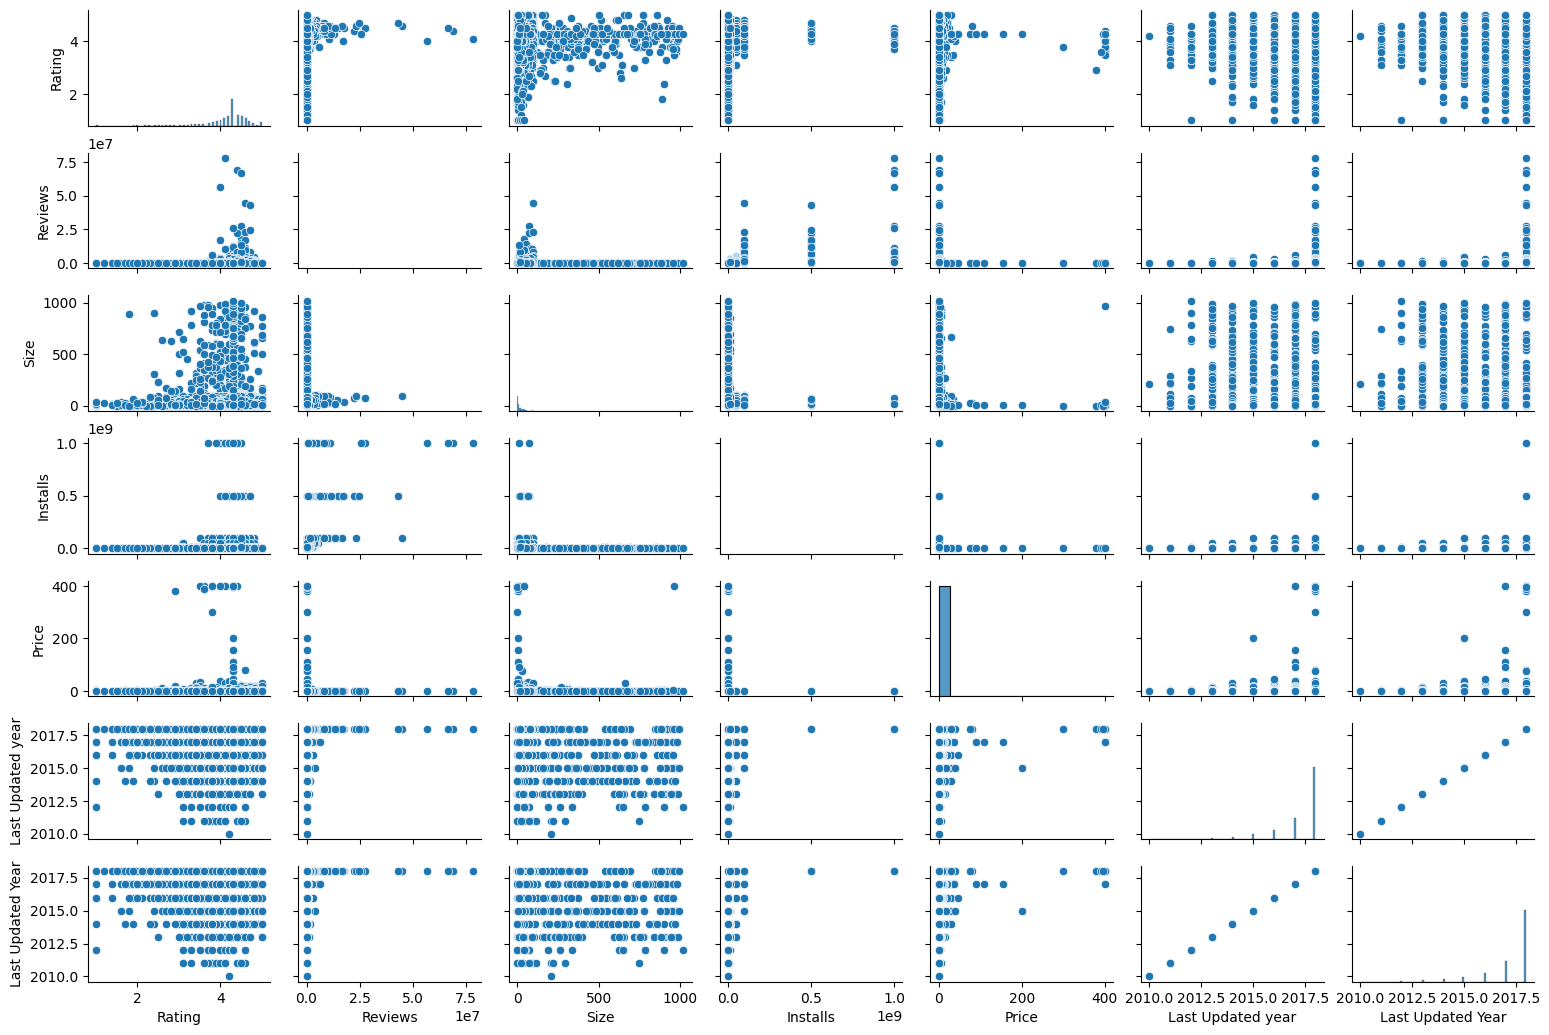

In [ ]:
# Pair Plot visualization code
sns.pairplot(play_store_data, height=1.5, aspect=1.5)

# Chart- 19

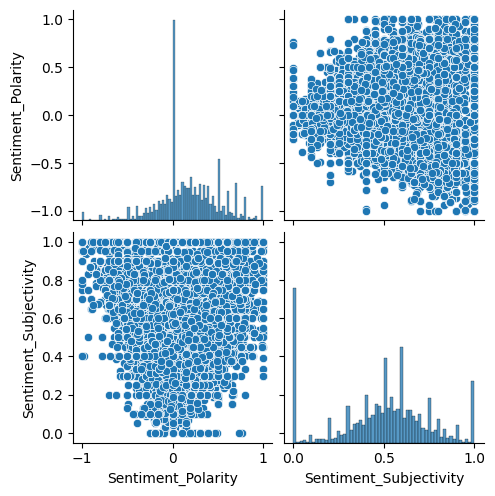

In [ ]:
# Pair plot visualiation code
sns.pairplot(user_reviews)

# Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

# What is/are the insight(s) found from the chart?

1. Most of the App are Free.
2. Most of the Paid Apps have Rating around 4
3. As the number of installation increases the number of reviews of the particular ¿op also increases
4. Most of the Apps are light-weighted.
5. We can see there are many outliers in Sentiment polarity and Sentiment subjectivity.
6. We can observe that from rating 3 to 5, there are many Sentiment polarity and Sentiment subjectivity points.
7. Free apps has higher number of ratings and installs.
8. Lesser app size has higher number of ratings.

# ***`5. Solution to Business Objective`***

 **What do you suggest the client to achieve Business Obiective?
Explain Briefly**.

• Since the majority of apps on the Play Store are free, the client can consider adopt ad-supported model for their apps. This involves offering a basic version of the app for free while providing additional premium features or content through in-app purchases or subscriptions.

• To differentiate their paid apps from the abundance of free alternatives, the client should focus on providing unique value and superior user experience. Identify specific user needs, pain points or desires and create apps that provide enhanced features, exclusive content, advanced functionality or premium experience that users are willing to pay for. Provide excellent customer support to paid app users.
Address their queries, concerns, or technical issues promptly and effectively.

• Given the majority of positive sentiment reviews, the client should leverage these positive experiences to their advantage. They can showcase positive reviews on their website, social media channels, or in marketing materials to build trust and credibilit. Encouragina satisfied customers to leave reviews and ratings can also help attract new customers.

• By addressing negative feedback in a transparent and constructive manner, the client can mitigate potential negative impacts and showcase their dedication to improving thair products or services.

• To ensure continued positive business impact, it is important for businesses to analyze customer feedback (both positive and negative) can provide valuable insights. Identifving common themes or recurring issues from negative and neutral reviews can help prioritize areas for improvement. The client should focus on addressing these issues, enhancing product quality by giving regular app updates.

• Provide multilingual support within the apps to cater to users from different regions and language backgrounds.

# Conclusion

1. **App Distribution**: The majority of apps on the Play Store (approximately 92%) are free, indicating a preference for free apps among users.
This highlights the importance of considering monetization strategies such as ads or in-app purchases.
2. **Age Restrictions**: Around 81.8% of the apps in the dataset have no age restrictions, indicating a broad target audience. This provides opportunities for developers to create apps that cater to a wide range of users
3. **Competitive Category**: The "Family" category is identified as the most competitive category, suggesting a need for developers to focus on
differentiation and unique value propositions within this category.
4. **Popular Category**: The "Game" category has the highest number of app installs, highlighting the popularity of gaming apps among users.
Developers can leverage this demand by creating engaging and high-quality game apps.
5. **Top-Rated Apps**: The majority of apps in the dataset are top-rated, which indicates a positive reception from users. This emphasizes the importance of delivering excellent user experiences and maintaining high-quality standards
6. **Category Analysis**: The top three categories with the highest app count are "Family! "Game" and "Tools." Developers can consider these categories for potential business opportunities.
7. **Genre Analysis**: The top genres include "Tools. "Entertainment" "Education," "Business, and "Medical." Developers can explore these genres to target specific user needs and preferences.
8. **Correlation**: There is a strong positive correlation between the number of app reviews and app installs, suggesting that popular apps tend to have a larger user base and consequently receive more reviews.